In [26]:
!pip install pandas scikit-learn nltk tensorflow keras matplotlib transformers keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 7.5 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    Narasi Tito Karnavian Berideologi Komunis Kare...
1    Anies: Seberat beratnya Pekerjaan Akan terasa ...
2    Hindu di india Melemparkan Patung Buatan Merek...
3    RSCM Praktekkan Penyedotan Plug  Vena/Saluran ...
4    Permohonan Kelonggaran Angsuran ke OJK Untuk s...
Name: content, dtype: object
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


59/59 ━━━━━━━━━━━━━━━━━━━━ 37s 578ms/step - accuracy: 0.7832 - loss: 0.5241 - val_accuracy: 0.8128 - val_loss: 0.4824
Epoch 2/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 34s 568ms/step - accuracy: 0.8234 - loss: 0.4696 - val_accuracy: 0.8128 - val_loss: 0.4822
Epoch 3/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 40s 565ms/step - accuracy: 0.8222 - loss: 0.4697 - val_accuracy: 0.8128 - val_loss: 0.4839
Epoch 4/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 43s 601ms/step - accuracy: 0.8228 - loss: 0.4697 - val_accuracy: 0.8128 - val_loss: 0.4827
Epoch 5/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 37s 527ms/step - accuracy: 0.8198 - loss: 0.4743 - val_accuracy: 0.8128 - val_loss: 0.4836
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 154ms/step - accuracy: 0.8398 - loss: 0.4402
Akurasi Model LSTM: 81.28%


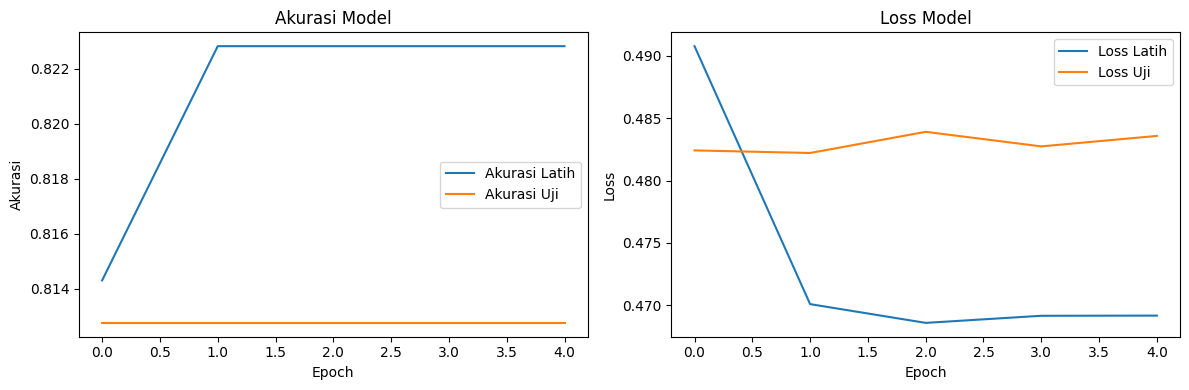

30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       176
           1       0.81      1.00      0.90       764

    accuracy                           0.81       940
   macro avg       0.41      0.50      0.45       940
weighted avg       0.66      0.81      0.73       940



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [22]:
# Import pustaka yang dibutuhkan
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Download stopwords dan pustaka lainnya jika belum diunduh
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# 1. Load Dataset yang sudah dibersihkan
dataset_path = '/content/cleaned_dataset.csv'  # Ganti dengan path ke file dataset di Google Drive
dataset = pd.read_csv(dataset_path)

# 2. Menangani nilai NaN dan memastikan kolom 'content' berisi string
dataset['content'] = dataset['content'].fillna('')  # Ganti NaN dengan string kosong

# Cek beberapa data pertama untuk memastikan kolom 'content' berisi data yang benar
print(dataset['content'].head())

# 3. Fungsi Preprocessing Teks
# Tokenisasi dan pembersihan teks
stop_words = set(stopwords.words('indonesian'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Memastikan input adalah string
    if isinstance(text, str):
        text = text.lower()  # Lowercase
        text = re.sub(r'[^a-z\s]', '', text)  # Hapus tanda baca dan angka
        tokens = word_tokenize(text)  # Tokenisasi
        tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Lematisasi dan hapus stopwords
        return ' '.join(tokens)
    else:
        return ''  # Jika input bukan string, kembalikan string kosong

# Terapkan preprocessing pada kolom 'content'
dataset['processed_content'] = dataset['content'].apply(preprocess_text)

# 4. Tokenisasi dan Padding Teks
tokenizer = Tokenizer(num_words=5000)  # Batasi hingga 5000 kata
tokenizer.fit_on_texts(dataset['processed_content'])
X = tokenizer.texts_to_sequences(dataset['processed_content'])

# Padding sequence untuk panjang yang konsisten
X_pad = pad_sequences(X, padding='post', maxlen=200)  # Sesuaikan maxlen sesuai kebutuhan

# Target label
y = dataset['label']

# 5. Membagi Data Menjadi Data Latih dan Data Uji
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)

# 6. Membangun Model LSTM
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=200))  # Layer embedding
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))  # Layer LSTM
model.add(Dense(1, activation='sigmoid'))  # Output layer

# Kompilasi model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 7. Melatih Model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# 8. Evaluasi Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Akurasi Model LSTM: {accuracy * 100:.2f}%')

# 9. Menampilkan hasil pelatihan (grafik loss dan akurasi)
plt.figure(figsize=(12, 4))

# Grafik Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Akurasi Latih')
plt.plot(history.history['val_accuracy'], label='Akurasi Uji')
plt.title('Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

# Grafik Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Latih')
plt.plot(history.history['val_loss'], label='Loss Uji')
plt.title('Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# 10. Menampilkan Classification Report
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Thresholding untuk klasifikasi biner

print(classification_report(y_test, y_pred))

# **Interpretasi Grafik**
# Grafik Akurasi:

Akurasi data latih meningkat dengan cepat dan stabil pada nilai tertentu setelah epoch pertama.
Akurasi data uji (validation accuracy) tampaknya stagnan atau bahkan tidak meningkat, menunjukkan kemungkinan overfitting.

# Grafik Loss:

Loss pada data latih menurun secara signifikan, yang merupakan indikasi bahwa model mempelajari pola dalam data.
Loss pada data uji terlihat cukup stabil, tetapi sedikit lebih tinggi dibandingkan dengan data latih, yang juga bisa menjadi indikasi overfitting.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 38s 553ms/step - accuracy: 0.8028 - loss: 0.5182 - val_accuracy: 0.8128 - val_loss: 0.4822
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 33s 564ms/step - accuracy: 0.8174 - loss: 0.4759 - val_accuracy: 0.8128 - val_loss: 0.4823
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 41s 572ms/step - accuracy: 0.8175 - loss: 0.4810 - val_accuracy: 0.8128 - val_loss: 0.4829
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 40s 559ms/step - accuracy: 0.8195 - loss: 0.4737 - val_accuracy: 0.8128 - val_loss: 0.4848
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 168ms/step - accuracy: 0.8398 - loss: 0.4425


Akurasi Model LSTM: 81.28%
Model telah disimpan sebagai 'lstm_hoax_detection.h5'


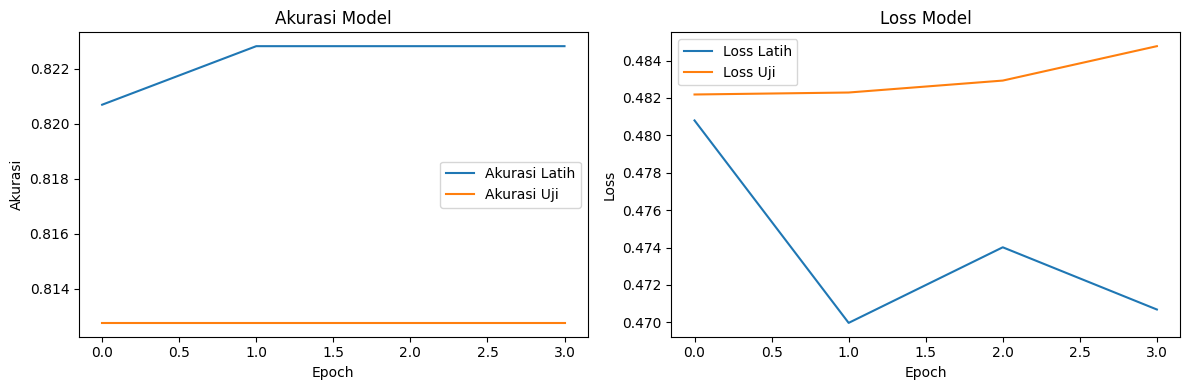

30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       176
           1       0.81      1.00      0.90       764

    accuracy                           0.81       940
   macro avg       0.41      0.50      0.45       940
weighted avg       0.66      0.81      0.73       940



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [23]:
# Import pustaka yang dibutuhkan
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Download stopwords dan pustaka lainnya jika belum diunduh
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# 1. Load Dataset
dataset_path = '/content/cleaned_dataset.csv'  # Ganti dengan path ke file dataset di Google Drive
dataset = pd.read_csv(dataset_path)

# 2. Menangani nilai NaN dan memastikan kolom 'content' berisi string
dataset['content'] = dataset['content'].fillna('')  # Ganti NaN dengan string kosong

# 3. Fungsi Preprocessing Teks
stop_words = set(stopwords.words('indonesian'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if isinstance(text, str):  # Memastikan input adalah string
        text = text.lower()  # Lowercase
        text = re.sub(r'[^a-z\s]', '', text)  # Hapus tanda baca dan angka
        tokens = word_tokenize(text)  # Tokenisasi
        tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Lematisasi dan hapus stopwords
        return ' '.join(tokens)
    else:
        return ''  # Jika input bukan string, kembalikan string kosong

# Terapkan preprocessing pada kolom 'content'
dataset['processed_content'] = dataset['content'].apply(preprocess_text)

# 4. Tokenisasi dan Padding Teks
tokenizer = Tokenizer(num_words=5000)  # Batasi hingga 5000 kata
tokenizer.fit_on_texts(dataset['processed_content'])
X = tokenizer.texts_to_sequences(dataset['processed_content'])

# Padding sequence untuk panjang yang konsisten
X_pad = pad_sequences(X, padding='post', maxlen=200)

# Target label
y = dataset['label']

# 5. Membagi Data Menjadi Data Latih dan Data Uji
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)

# 6. Membangun Model LSTM dengan Dropout
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=200))  # Layer embedding
model.add(LSTM(128, dropout=0.3, recurrent_dropout=0.3))  # Layer LSTM dengan dropout
model.add(Dropout(0.3))  # Dropout tambahan untuk mencegah overfitting
model.add(Dense(1, activation='sigmoid'))  # Output layer

# Kompilasi model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 7. Callback untuk Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# 8. Melatih Model
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

# 9. Evaluasi Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Akurasi Model LSTM: {accuracy * 100:.2f}%")

# 10. Menyimpan Model
model.save('/content/hasil_model/lstm_hoax_detection.h5')
print("Model telah disimpan sebagai 'lstm_hoax_detection.h5'")

# 11. Menampilkan Grafik Akurasi dan Loss
plt.figure(figsize=(12, 4))

# Grafik Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Akurasi Latih')
plt.plot(history.history['val_accuracy'], label='Akurasi Uji')
plt.title('Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

# Grafik Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Latih')
plt.plot(history.history['val_loss'], label='Loss Uji')
plt.title('Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# 12. Menampilkan Classification Report
y_pred = model.predict(X_test) > 0.5  # Threshold untuk klasifikasi
print(classification_report(y_test, y_pred))

# **Interpretasi Grafik**
# Grafik Akurasi:

**Akurasi Latih:**
Model berhasil mencapai akurasi yang stabil pada data latih sekitar 82%.

**Akurasi Uji:**
Akurasi uji tetap rendah dibandingkan data latih, menunjukkan kemungkinan underfitting atau model belum cukup belajar pola pada data.

# Grafik Loss:

**Loss Latih:**
Loss pada data latih menurun, menunjukkan bahwa model belajar dengan baik pada data pelatihan.

**Loss Uji:**
Loss pada data uji meningkat secara bertahap, menunjukkan bahwa model mungkin mengalami kesulitan menangkap pola pada data uji.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


59/59 ━━━━━━━━━━━━━━━━━━━━ 153s 2s/step - accuracy: 0.7539 - loss: 1.6110 - val_accuracy: 0.8128 - val_loss: 1.3869 - learning_rate: 1.0000e-04
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.8268 - loss: 1.3431 - val_accuracy: 0.8128 - val_loss: 1.2828 - learning_rate: 1.0000e-04
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 198s 2s/step - accuracy: 0.8189 - loss: 1.2565 - val_accuracy: 0.8128 - val_loss: 1.1906 - learning_rate: 1.0000e-04
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.8204 - loss: 1.1643 - val_accuracy: 0.8128 - val_loss: 1.1079 - learning_rate: 1.0000e-04
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.8283 - loss: 1.0717 - val_accuracy: 0.8128 - val_loss: 1.0336 - learning_rate: 1.0000e-04
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.8135 - loss: 1.0032 - val_accuracy: 0.8128 - val_loss: 0.9431 - learning_rate: 1.0000e-04
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.8470 - loss: 0.8

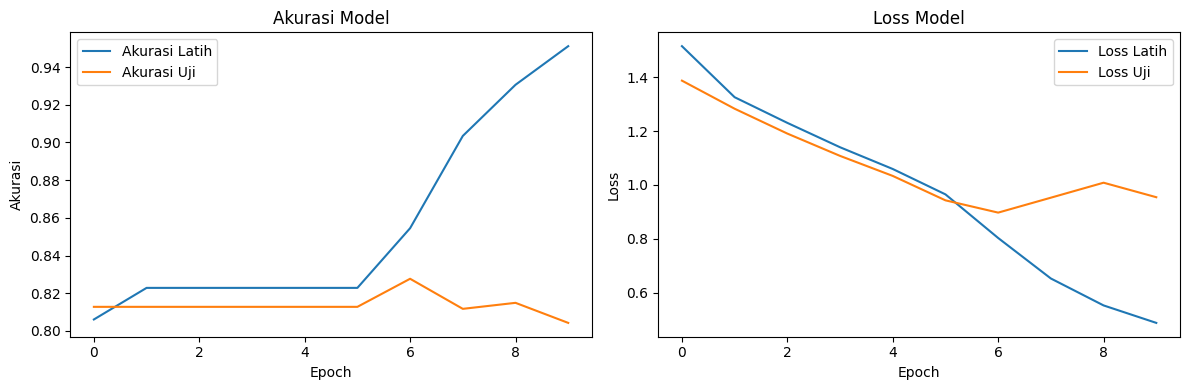

30/30 ━━━━━━━━━━━━━━━━━━━━ 15s 453ms/step


              precision    recall  f1-score   support

           0       0.63      0.19      0.29       176
           1       0.84      0.98      0.90       764

    accuracy                           0.83       940
   macro avg       0.74      0.58      0.60       940
weighted avg       0.80      0.83      0.79       940

Model telah disimpan sebagai 'bilstm_hoax_detection.h5'


In [24]:
# Import pustaka yang dibutuhkan
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Download stopwords dan pustaka lainnya jika belum diunduh
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# 1. Load Dataset
dataset_path = '/content/cleaned_dataset.csv'  # Ganti dengan path ke dataset
dataset = pd.read_csv(dataset_path)

# 2. Preprocessing Teks
stop_words = set(stopwords.words('indonesian'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'[^a-z\s]', '', text)  # Hapus tanda baca dan angka
        tokens = word_tokenize(text)
        tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
        return ' '.join(tokens)
    else:
        return ''  # Jika input bukan string, kembalikan string kosong

dataset['content'] = dataset['content'].fillna('')  # Ganti NaN dengan string kosong
dataset['processed_content'] = dataset['content'].apply(preprocess_text)

# 3. Tokenisasi dan Padding
tokenizer = Tokenizer(num_words=5000)  # Batasi hingga 5000 kata
tokenizer.fit_on_texts(dataset['processed_content'])
X = tokenizer.texts_to_sequences(dataset['processed_content'])
X_pad = pad_sequences(X, padding='post', maxlen=200)

# Target label
y = dataset['label']

# 4. Membagi Data Latih dan Uji
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)

# 5. Membangun Model BiLSTM dengan Regularisasi
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=200))  # Embedding layer
model.add(Bidirectional(LSTM(128, dropout=0.3, return_sequences=True)))  # BiLSTM pertama
model.add(Bidirectional(LSTM(128, dropout=0.3)))  # BiLSTM kedua
model.add(Dense(64, activation='relu', kernel_regularizer='l2'))  # Dense layer dengan regularisasi L2
model.add(Dropout(0.3))  # Dropout tambahan
model.add(Dense(1, activation='sigmoid'))  # Output layer

# Kompilasi Model
optimizer = Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# 6. Callbacks: Early Stopping dan Learning Rate Scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=1e-6)

# 7. Melatih Model
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, lr_scheduler]
)

# 8. Evaluasi Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Akurasi Model BiLSTM: {accuracy * 100:.2f}%")

# 9. Menampilkan Grafik Akurasi dan Loss
plt.figure(figsize=(12, 4))

# Grafik Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Akurasi Latih')
plt.plot(history.history['val_accuracy'], label='Akurasi Uji')
plt.title('Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

# Grafik Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Latih')
plt.plot(history.history['val_loss'], label='Loss Uji')
plt.title('Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# 10. Classification Report
y_pred = (model.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred))

# 11. Menyimpan Model
model.save('/content/hasil_model/bilstm_hoax_detection.h5')
print("Model telah disimpan sebagai 'bilstm_hoax_detection.h5'")

# **Analisis Grafik**
# Grafik Akurasi:

**Akurasi Latih:**
Meningkat dengan signifikan hingga mencapai lebih dari 94%. Ini menunjukkan model dapat mempelajari pola dengan baik pada data latih.

**Akurasi Uji:**
Stabil di sekitar 82% hingga 84%, tetapi tidak meningkat seiring dengan data latih. Perbedaan ini bisa menjadi indikasi overfitting ringan, meskipun masih dalam batas wajar.

# Grafik Loss:

**Loss Latih:**
Menurun secara konsisten, menunjukkan model berhasil meminimalkan kesalahan pada data latih.

**Loss Uji:**
Turun dengan pola yang mirip dengan loss latih, tetapi cenderung stagnan setelah beberapa epoch, menunjukkan model mulai mendekati batas optimalnya.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


59/59 ━━━━━━━━━━━━━━━━━━━━ 153s 2s/step - accuracy: 0.6871 - loss: 1.6248 - val_accuracy: 0.8128 - val_loss: 1.3845 - learning_rate: 1.0000e-04
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.8337 - loss: 1.3373 - val_accuracy: 0.8128 - val_loss: 1.2786 - learning_rate: 1.0000e-04
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 153s 3s/step - accuracy: 0.8276 - loss: 1.2399 - val_accuracy: 0.8128 - val_loss: 1.1842 - learning_rate: 1.0000e-04
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 193s 2s/step - accuracy: 0.8337 - loss: 1.1303 - val_accuracy: 0.8128 - val_loss: 1.0995 - learning_rate: 1.0000e-04
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.8217 - loss: 1.0611 - val_accuracy: 0.8128 - val_loss: 1.0122 - learning_rate: 1.0000e-04
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.8454 - loss: 0.8930 - val_accuracy: 0.8138 - val_loss: 0.9513 - learning_rate: 1.0000e-04
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.9087 - loss: 0.7

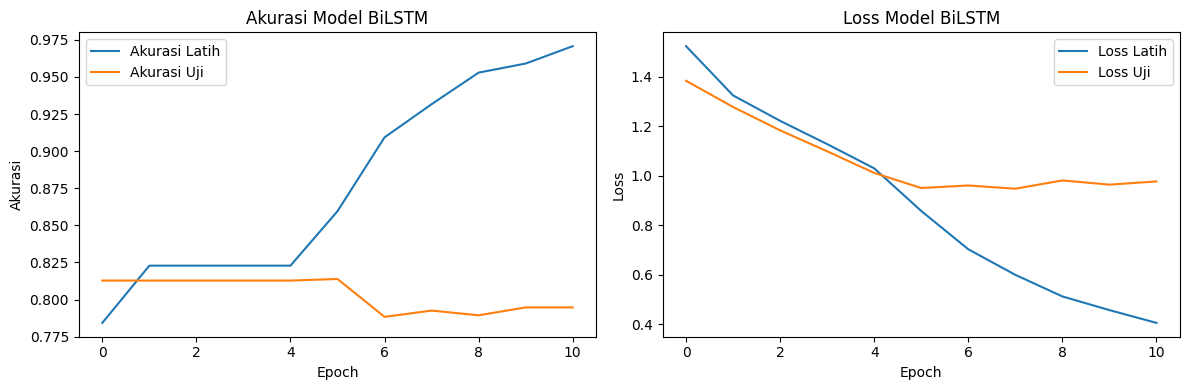

30/30 ━━━━━━━━━━━━━━━━━━━━ 15s 492ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.36      0.40       176
           1       0.86      0.89      0.87       764

    accuracy                           0.79       940
   macro avg       0.65      0.63      0.64       940
weighted avg       0.78      0.79      0.79       940



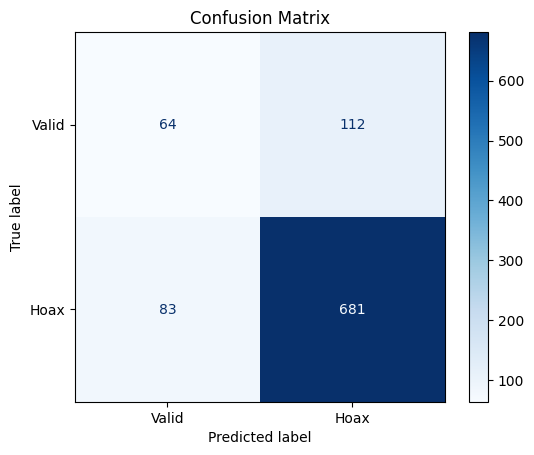

Model telah disimpan sebagai 'bilstm_hoax_detection.h5'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
Teks: Berita ini benar-benar palsu, jangan percaya!
Prediksi: Hoax (Probabilitas: 0.65)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
Teks: Pemerintah baru saja mengumumkan kebijakan baru untuk pendidikan.
Prediksi: Hoax (Probabilitas: 0.93)


In [4]:
# Import pustaka yang dibutuhkan
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Download stopwords dan pustaka lainnya jika belum diunduh
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# 1. Load Dataset
dataset_path = '/content/cleaned_dataset.csv'  # Ganti dengan path ke dataset
dataset = pd.read_csv(dataset_path)

# 2. Preprocessing Teks
stop_words = set(stopwords.words('indonesian'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'[^a-z\s]', '', text)  # Hapus tanda baca dan angka
        tokens = word_tokenize(text)
        tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
        return ' '.join(tokens)
    else:
        return ''  # Jika input bukan string, kembalikan string kosong

dataset['content'] = dataset['content'].fillna('')  # Ganti NaN dengan string kosong
dataset['processed_content'] = dataset['content'].apply(preprocess_text)

# 3. Tokenisasi dan Padding
tokenizer = Tokenizer(num_words=5000)  # Batasi hingga 5000 kata
tokenizer.fit_on_texts(dataset['processed_content'])
X = tokenizer.texts_to_sequences(dataset['processed_content'])
X_pad = pad_sequences(X, padding='post', maxlen=200)

# Target label
y = dataset['label']

# 4. Membagi Data Latih dan Uji
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)

# 5. Membangun Model BiLSTM dengan Regularisasi
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=200))  # Embedding layer
model.add(Bidirectional(LSTM(128, dropout=0.3, return_sequences=True)))  # BiLSTM pertama
model.add(Bidirectional(LSTM(128, dropout=0.3)))  # BiLSTM kedua
model.add(Dense(64, activation='relu', kernel_regularizer='l2'))  # Dense layer dengan regularisasi L2
model.add(Dropout(0.3))  # Dropout tambahan
model.add(Dense(1, activation='sigmoid'))  # Output layer

# Kompilasi Model
optimizer = Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# 6. Callbacks: Early Stopping dan Learning Rate Scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=1e-6)

# 7. Melatih Model
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, lr_scheduler]
)

# 8. Evaluasi Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Akurasi Model BiLSTM: {accuracy * 100:.2f}%")

# 9. Menampilkan Grafik Akurasi dan Loss
plt.figure(figsize=(12, 4))

# Grafik Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Akurasi Latih')
plt.plot(history.history['val_accuracy'], label='Akurasi Uji')
plt.title('Akurasi Model BiLSTM')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

# Grafik Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Latih')
plt.plot(history.history['val_loss'], label='Loss Uji')
plt.title('Loss Model BiLSTM')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# 10. Classification Report
y_pred = (model.predict(X_test) > 0.5).astype(int)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Valid", "Hoax"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# 11. Menyimpan Model
model.save('/content/hasil_model/bilstm_hoax_detection-v2.h5')
print("Model telah disimpan sebagai 'bilstm_hoax_detection.h5'")

# 12. Prediksi Baru
def predict_text(text):
    # Preprocessing teks baru
    processed_text = preprocess_text(text)
    tokenized_text = tokenizer.texts_to_sequences([processed_text])
    padded_text = pad_sequences(tokenized_text, padding='post', maxlen=200)

    # Prediksi
    prediction = model.predict(padded_text)
    result = "Hoax" if prediction[0][0] > 0.5 else "Valid"
    print(f"Teks: {text}")
    print(f"Prediksi: {result} (Probabilitas: {prediction[0][0]:.2f})")

# Contoh Prediksi
predict_text("Berita ini benar-benar palsu, jangan percaya!")
predict_text("Pemerintah baru saja mengumumkan kebijakan baru untuk pendidikan.")

# **Analisis Grafik Akurasi dan Loss**
# Grafik Akurasi:

1.   Akurasi data latih meningkat secara konsisten hingga mencapai lebih dari 95%.
2.   Akurasi data uji stagnan di sekitar 80%-82%, menunjukkan model mengalami overfitting pada data latih.

# Grafik Loss:


1.  Loss data latih terus menurun, menunjukkan model belajar pola pada data latih.
2.  Loss data uji menurun hingga titik tertentu tetapi mulai stagnan, yang konsisten dengan stagnasi akurasi data uji.

# **Analisis Confusion Matrix**

## 1.  Kinerja pada Kelas "Valid":

* **True Positives (TP):** 64 data valid diprediksi benar sebagai valid.
* **False Negatives (FN):** 83 data valid diprediksi sebagai hoax.
* Kelas "Valid" memiliki jumlah kesalahan (FN) yang cukup signifikan.

## 2. Kinerja pada Kelas "Hoax":

* **True Negatives (TN):** 681 data hoax diprediksi benar sebagai hoax.
* **False Positives (FP):** 112 data hoax diprediksi sebagai valid.
* Kelas "Hoax" menunjukkan performa yang jauh lebih baik dibandingkan kelas "Valid."

# **Kesimpulan Awal**

## 1. Model Cenderung Bias ke Kelas Hoax:
* Model lebih efektif dalam mengenali berita hoax daripada berita valid. Hal ini terlihat dari jumlah prediksi benar yang jauh lebih banyak untuk kelas hoax.

## 2. Overfitting pada Data Latih:
* Perbedaan signifikan antara akurasi data latih dan data uji menunjukkan overfitting.